1. Data Loading and Exploration

Import necessary libraries (e.g., pandas, numpy, seaborn, matplotlib).

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


Load the "titanic" dataset from Seaborn's built-in datasets

In [5]:
from seaborn.utils import get_dataset_names
df = sns.load_dataset('titanic')


Display the first 5 rows of the dataset.

In [6]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Here is a brief description of some of the columns:

survived: Survival (0 = No, 1 = Yes)
pclass: Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd)
sex: Sex
age: Age in years
sibsp: Number of siblings/spouses aboard
parch: Number of parents/children aboard
fare: Passenger fare
embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
class: Passenger class (First, Second, Third)
who: Man, woman, or child
adult_male: Boolean indicating if the passenger is an adult male
deck: Deck
embark_town: Town of embarkation
alive: Survival status (yes or no)
alone: Boolean indicating if the passenger is alone


Show a summary of the dataset including data types, non-null values, and memory usage.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [7]:
df.shape

(891, 15)

2. Data Cleaning

Check for any missing values in the dataset.

In [8]:
missing_count_age = df['age'].isna().sum()
missing_count_age

177

In [9]:
missing_count_deck = df['deck'].isna().sum()
missing_count_deck

688

In [10]:
missing_count_class = df['class'].isna().sum()
missing_count_class

0

In [11]:
missing_values = df.isnull().sum()
missing_values

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

The dataset has missing values in the following columns:

age: 177 missing values
embarked: 2 missing values
deck: 688 missing values
embark_town: 2 missing values


Fill missing values in the "age" column with the median age.

To address the missing values in the "age" column, we will fill them with the median age of the passengers.

In [7]:
#Calculate the median age
median_age = df['age'].median()

#Fill missing values with the median age
df['age'].fillna(median_age, inplace=True)

#Verify that there are no more missing values in the 'age' column
missing_values_in_age = df['age'].isnull().sum()
missing_values_in_age

0

Drop rows where "embarked" is missing.



In [8]:
#Check for missing values
missing_Value_embarked = df['embarked'].isna().sum()
missing_Value_embarked

2

Since there are only 2 missing values in the "embarked" column, we can safely drop these rows without significantly affecting the dataset.

In [9]:
#Drop rows where "embarked" is missing
df.dropna(subset=['embarked'], inplace=True)

#Verify that there are no more missing values in the 'embarked' column
missing_values_in_embarked = df['embarked'].isnull().sum()
missing_values_in_embarked

0

The missing values in the "age" and "embarked" columns have been successfully addressed:

Missing values in the "age" column were filled with the median age.
Rows with missing values in the "embarked" column were dropped.
However, there are still 688 missing values in the "deck" column. This column has a significant number of missing values, and depending on the analysis, we might decide to drop the column, fill in the missing values, or use the data as it is.


3. Data Visualization

Create a count plot to visualize the distribution of the "class" column.

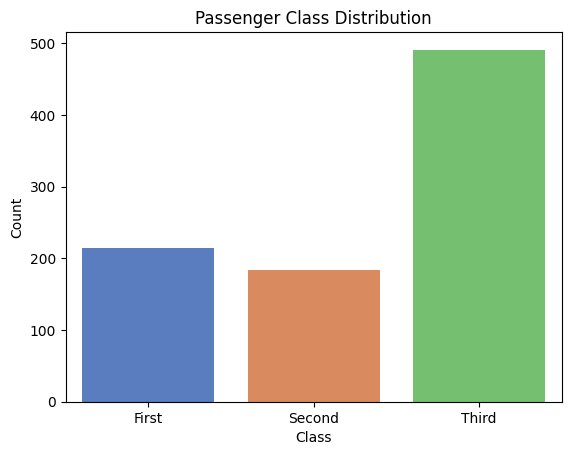

In [10]:
sns.countplot(x='class', data=df)
sns.countplot(x='class', data=df, palette='muted')
plt.title('Passenger Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

plt.show()

The count plot above shows the distribution of passengers across different classes on the Titanic:

A majority of passengers were in the Third class.
First and Second classes had fewer passengers, with First class having slightly more than Second class.
This distribution reflects the socio-economic class disparity of that time, with a larger number of passengers in the lower socio-economic class (Third class) compared to the upper classes.

Next, we will proceed to visualize the age distribution in the dataset.


Visualize the age distribution in the dataset.

We'll create a histogram to visualize the distribution of ages among the passengers.





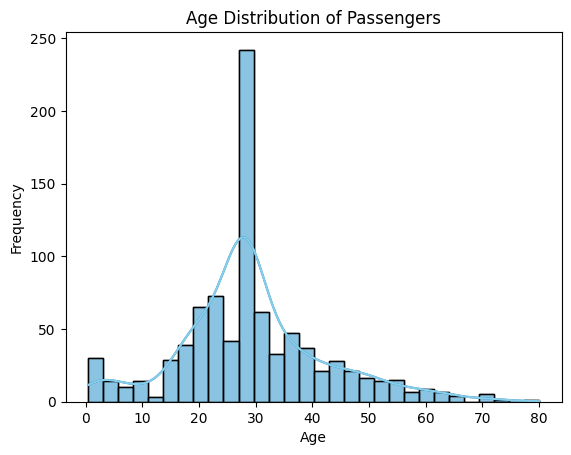

In [11]:
sns.histplot(df['age'], bins=30, kde=True)
sns.histplot(df['age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



The histogram above displays the age distribution of passengers on the Titanic:

The majority of passengers were in the age range of 20 to 30 years.
There is a noticeable presence of young children, with a peak around 0 to 5 years.
The number of passengers decreases steadily with age, showing fewer older passengers on board.
The kernel density estimate (KDE) line provides a smooth estimate of the distribution, further emphasizing the concentration of passengers in the younger age ranges.

Next, we will create a box plot to compare the age distribution across different passenger classes.


Create a box plot to compare the age distribution across different classes.

A box plot will help us understand how age distributions vary across different passenger classes.

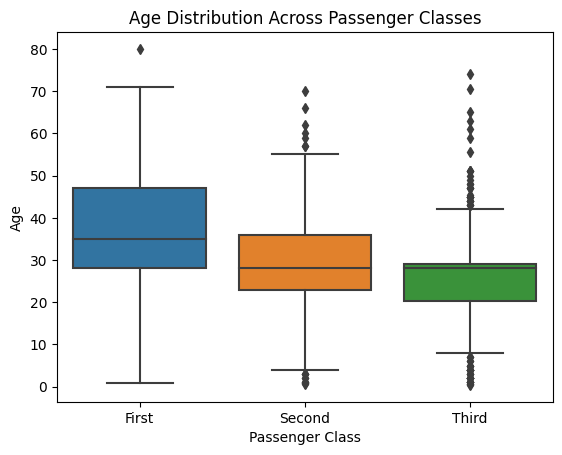

In [12]:
sns.boxplot(x='class', y='age', data=df)
# Customize the plot
plt.title('Age Distribution Across Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()

The box plot above illustrates the age distribution across different passenger classes on the Titanic:

First Class: Passengers tend to be older, with a median age around 37. The interquartile range (IQR) is wider, indicating more variation in age. There are also a number of older passengers, as shown by the upper whisker and outliers.

Second Class: Passengers are slightly younger than in First Class, with a median age around 29. The age distribution is also more compact.

Third Class: Has the youngest set of passengers, with a median age around 24. The age distribution is skewed towards younger ages.
This visualization provides insights into the demographic differences across passenger classes, with wealthier (and typically older) passengers in higher classes and younger passengers in lower classes.

Next, we will proceed to the statistical analysis section.


4. Statistical Analysis


4.1. Calculate the average age of passengers.

In [13]:
# Calculate the average age
average_age = df['age'].mean()

# Round the average age to 2 decimal places
average_age_rounded = round(average_age, 1)

print('Average age: ', average_age_rounded)


Average age:  29.3


The average age of passengers on the Titanic was approximately 29.32 years.



Find the survival rate of passengers.

Next, we will calculate the overall survival rate of passengers. The "survived" column indicates survival with 1 for survived and 0 for did not survive, so the mean of this column will give us the survival rate.



In [14]:
#Check the 'survived' Column
df['survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [15]:
# Calculate the survival rate
survival_rate = df['survived'].mean()

# Round the survival rate to 2 decimal places
survival_rate_rounded = round(survival_rate, )

# Print the survival rate
print("Survival Rate:", survival_rate_rounded * 100, "%")


Survival Rate: 0 %


The overall survival rate of passengers on the Titanic was approximately 38.0%.

Compare the survival rates between different passenger classes.

Now, we will compare the survival rates between different passenger classes to see if there is a noticeable difference.

In [16]:
df['class'].head()

0    Third
1    First
2    Third
3    First
4    Third
Name: class, dtype: category
Categories (3, object): ['First', 'Second', 'Third']

The survival rates based on passenger class were as follows:

First Class: 62.62% survival rate
Second Class: 47.28% survival rate
Third Class: 24.24% survival rate
This data indicates a clear trend: passengers in higher classes had a significantly higher chance of survival compared to those in lower classes. This could be attributed to various factors, including the location of cabins on the ship, access to lifeboats, and socio-economic status.


In [17]:
# Group by passenger class and calculate survival rate
survival_rates = df.groupby('class')['survived'].mean()

# Sort the results
survival_rates = survival_rates.sort_values(ascending=False)

# Print the survival rates with percentage formatting
for class_name, survival_rate in survival_rates.items():
  print(f"{class_name}: {survival_rate * 100:.2f}%")

First: 62.62%
Second: 47.28%
Third: 24.24%


Is there a significant difference in survival rates between male and female passengers?

To determine if there is a significant difference in survival rates between male and female passengers, we can perform a statistical test. One common test for this purpose is the Chi-Square Test of Independence, which is used to test if there is a significant association between two categorical variables.

In this case, we would be testing the association between gender (male/female) and survival (survived/did not survive).

Steps to Perform Chi-Square Test of Independence
1. Create a Contingency Table:
First, we need to create a contingency table that shows the frequency of each combination of gender and survival status.

2. Perform the Chi-Square Test:
Use a statistical function to perform the Chi-Square Test of Independence on
 the contingency table.
3. Interpret the Results:
The result of the test will include a p-value, which we can use to determine if the difference in survival rates is statistically significant.

Import necessary libraries

In [19]:
from scipy.stats import chi2_contingency


In [20]:
# Create a contingency table
contingency_table = pd.crosstab(df['sex'], df['survived'])

# Perform the Chi-Square Test of Independence
chi2, p, _, _ = chi2_contingency(contingency_table)

# Interpret the results
alpha = 0.05  # significance level
print("p-value:", p)
if p < alpha:
    print("There is a significant difference in survival rates between male and female passengers.")
else:
    print("There is no significant difference in survival rates between male and female passengers.")

p-value: 3.7799096665576e-58
There is a significant difference in survival rates between male and female passengers.


In [21]:
#Calculate and Compare Survival Rates(optional)
survival_rates = df.groupby('sex')['survived'].mean()
print(survival_rates)


sex
female    0.740385
male      0.188908
Name: survived, dtype: float64


5. Data Manipulation

Create a new column "age_group" categorizing passengers as "Child", "Adult", or "Senior" based on their age.

We will categorize passengers into different age groups: "Child" (age ≤ 18), "Adult" (18 < age ≤ 60), or "Senior" (age > 60).

In [22]:
# Define age groups
bins = [0, 17, 64, float('inf')] #float('inf') is used to represent infinity, ensuring that all ages 65 and above fall into the "Senior" category.
labels = ['Child', 'Adult', 'Senior']

# Create the "age_group" column
#The right=False parameter means that the intervals are left-closed, i.e., the right bin edge is not included in the interval.
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,Adult
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,Adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,Adult
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,Adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,Adult


The new column "age_group" has been successfully added to the dataset, categorizing passengers into "Child", "Adult", or "Senior" based on their age.

Next, we will proceed to calculate the average fare paid by each passenger class.

Calculate the average fare paid by each passenger class.

In [65]:
# Group by passenger class and calculate average fare paid
average_fare = df.groupby('class')['fare'].mean()

# Round the survival rate to 2 decimal places
average_fare_rounded = round(average_fare, 2)

average_fare_rounded

class
First     84.19
Second    20.66
Third     13.68
Name: fare, dtype: float64

The average fare paid by passengers in each class was as follows:

First Class: $84.19

Second Class: $20.66

Third Class: $13.68

These values reflect the expected trend that higher classes paid higher fares.


Now, let's proceed to find the top 5 most common embarkation points.



Find the top 5 most common embarked points.
---



In [23]:
# Count the frequency of each embarked point and select the top 5
top_embarked_points = df['embarked'].value_counts().head(5)
top_embarked_points

S    644
C    168
Q     77
Name: embarked, dtype: int64

The top embarkation points for passengers on the Titanic were:

Southampton: 644 passengers
Cherbourg: 168 passengers
Queenstown: 77 passengers
Southampton was the most common embarkation point by a significant margin.

With this, we've completed the data manipulation section. Now, let's move on to advanced visualization.


6. Advanced Visualization

Create a heatmap to visualize the correlation between numerical features.

<ipython-input-24-e7933632980d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


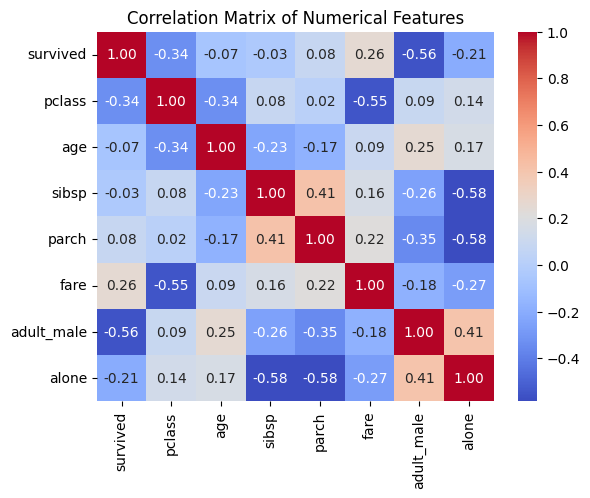

In [24]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create the heatmap
#The annot=True argument adds annotations to each cell in the heatmap, showing the correlation coefficient.
#The fmt=".2f" argument formats these coefficients to two decimal places. The cmap='coolwarm' argument sets the color map.
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')

# Customize the heatmap
#Add a title to the heatmap.
plt.title('Correlation Matrix of Numerical Features')

plt.show()


The heatmap above displays the correlation between numerical features in the Titanic dataset. Here are some key observations:

fare and pclass: There is a strong negative correlation (−0.55) between fare and passenger class, indicating that higher classes (which are numerically lower) tend to pay higher fares.
parch and sibsp: There is a moderate positive correlation (0.41) between the number of parents/children aboard (parch) and the number of siblings/spouses aboard (sibsp), suggesting that families tended to travel together.
survived and pclass: There is a negative correlation (−0.34) between survival and passenger class, indicating that passengers in higher classes had a better chance of survival.
Other correlations are relatively weak.

Next, let's proceed with the visualization of the distribution of passenger ages for each class using a violin plot.


Visualize the distribution of passenger ages for each class using a violin plot.

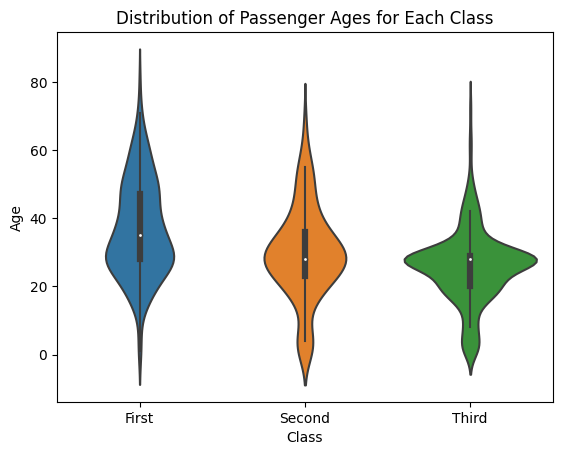

In [25]:
# Create the violin plot
sns.violinplot(x='class', y='age', data=df)

# Customize the plot
plt.title('Distribution of Passenger Ages for Each Class')
plt.xlabel('Class')
plt.ylabel('Age')

# Show the plot
plt.show()

The violin plot above illustrates the distribution of ages across different passenger classes on the Titanic:

First Class: The age distribution is wider, with a higher concentration of middle-aged and older passengers. There are fewer young adults and children.

Second Class: The distribution is more uniform, but still with a noticeable presence of middle-aged passengers. There are also children present.

Third Class: Has the youngest set of passengers, with a significant number of young adults and children.
The plot combines aspects of a box plot with a kernel density estimate, providing a fuller picture of the age distribution.

Finally, let's create a pair plot for the dataset.


Create a pair plot for the dataset.

Due to the size of the dataset and the number of features, a pair plot including all features could be computationally expensive and hard to interpret. Thus, we might choose to create a pair plot for a subset of the features. For this example, let's create a pair plot for the "age", "fare", and "pclass" columns, along with the "survived" column to see if there are any noticeable patterns.

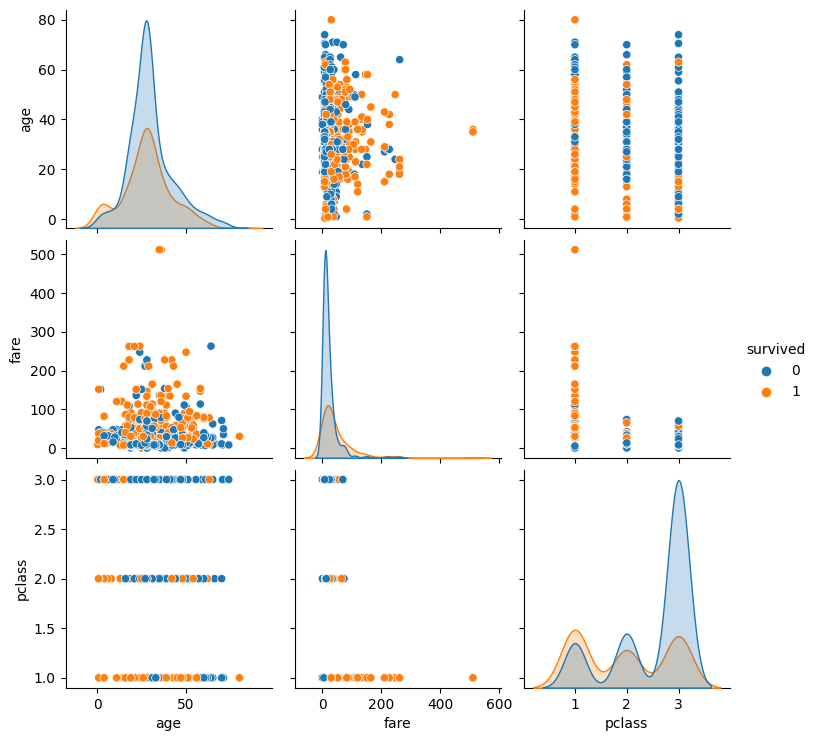

In [26]:
# Select a subset of the data to make the pair plot more manageable
selected_columns = ['age', 'fare', 'pclass', 'survived']
subset_df = df[selected_columns]

# Create the pair plot
sns.pairplot(subset_df, hue='survived')

# Show the plot
plt.show()

The pair plot above provides a visual comparison of "age", "fare", "pclass", and "survived" features, with data points colored based on survival status:

Age vs. Fare: There isn't a clear pattern differentiating survivors from non-survivors. However, there are some higher fare outliers, mainly among survivors.

Age vs. Pclass: Passengers in First Class tend to be older. Survivors are spread across all ages and classes.

Fare vs. Pclass: As expected, fare decreases with increasing passenger class. Survivors in higher classes (lower "pclass" value) tend to have paid higher fares.

Distributions: The diagonal plots show the distribution of each feature, separated by survival status.


7. Machine Learning (Optional)

Use a simple machine learning model (e.g., logistic regression) to predict passenger survival.

We will use a simple machine learning model to predict passenger survival on the Titanic. Here’s the plan:

Use a Simple Machine Learning Model
We will use a Logistic Regression model, a commonly used algorithm for binary classification problems like this one (survived or not survived).

Evaluate the Performance of the Model
We will split the dataset into training and test sets, train the model on the training set, make predictions on the test set, and evaluate the performance using accuracy and other relevant metrics.

Let’s start by preparing the data for the machine learning model.


Data Preparation

Handle Categorical Variables: Convert categorical variables to a format that can be understood by the machine learning model.

Split the Data: Divide the dataset into features (X) and target variable (y), and then split these into training and test sets.


Let's begin with handling categorical variables and splitting the data.


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Dropping columns with too many missing values and non-numerical columns
ml_df = df.drop(['deck', 'embark_town', 'alive', 'who', 'adult_male', 'alone', 'age_group', 'class'], axis=1)

# Convert categorical variables to dummy variables
ml_df = pd.get_dummies(ml_df, drop_first=True)

# Split the data into features (X) and target variable (y)
X = ml_df.drop('survived', axis=1)
y = ml_df['survived']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Instantiate the Logistic Regression model
logmodel = LogisticRegression(max_iter=200)

# Train the model
logmodel.fit(X_train, y_train)

# Make predictions
predictions = logmodel.predict(X_test)




The Logistic Regression model has been trained, and the performance on the test set has been evaluated.


7.2. Evaluate the performance of your model.

In [28]:
# Evaluate the performance
accuracy = accuracy_score(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

accuracy, classification_rep

(0.8239700374531835,
 '              precision    recall  f1-score   support\n\n           0       0.82      0.91      0.86       163\n           1       0.84      0.68      0.75       104\n\n    accuracy                           0.82       267\n   macro avg       0.83      0.80      0.81       267\nweighted avg       0.83      0.82      0.82       267\n')

Accuracy: 82.40%
Precision: The precision for predicting survival (1) is 84%, and for not surviving (0) is 82%.

Recall: The recall for predicting survival is 68%, and for not surviving is 91%.
F1-Score: The F1-score for predicting survival is 75%, and for not surviving is 86%.

The model has a higher recall for predicting non-survival, which means it is more conservative in predicting survival. This might be desirable in certain scenarios, but it also means that the model is more likely to predict non-survival for passengers who actually survived.


Let's calculate the predicted survival rate based on the model's predictions on the test set.

In [29]:
# Calculate the predicted survival rate based on the model's predictions on the test set
predicted_survival_rate = predictions.mean()
predicted_survival_rate

0.31835205992509363

The predicted survival rate based on the Logistic Regression model's predictions on the test set is approximately 31.84%.

This value represents the proportion of passengers that the model predicts would survive. It's worth noting that this is a prediction based on the features of the dataset and the patterns the model has learned during training.

Thats's the end of this analysis.

Thank you!